<a href="https://colab.research.google.com/github/Udhay2898/HR-Analysis-EDA/blob/Master/HR_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING**
The first thing we always do when we start with our work is to import the libraries.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Now that we are done with importing let’s load the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/HR_comma_sep.csv')
df.sample(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
5321,0.83,0.61,5,246,3,0,0,0,support,medium
3935,0.55,0.57,3,266,2,0,0,0,technical,medium
977,0.11,0.87,5,303,4,0,1,0,IT,low


**CHECKING FOR THE NEATNESS OF THE DATA**


Now that the data is loaded. Let’s take a look at how the data is, i.e, the data types, the no of NaN values etc., We can do that by using the .info() method

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Now we see the Columns Name

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments', 'salary'],
      dtype='object')

As we seen Columns Name, Now we See the **Unique** value of each Columns

In [ ]:
for col in df.columns:
    print(f"{col} - ", df[col].unique())
    print()

satisfaction_level -  [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]

last_evaluation -  [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]

number_project -  [2 5 7 6 4 3]

average_montly_hours -  [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 

There seem to be no weird values in the data, which is very good. Let’s look at the metrics.

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Now that we took a look at the data, Let’s get into my favourite part, EDA.

**EXPLORATORY DATA ANALYSIS (EDA)**

In this, we will be visualizing the data. By doing this we will be able to further understand how the data is and if there is any work that is to be done.

In [ ]:
dept_df = df.groupby('Departments').agg({
    'average_montly_hours': 'mean'}).reset_index()

dept_df

,Departments,average_montly_hours
0,IT,202.215974
1,RandD,200.800508
2,accounting,201.162973
3,hr,198.684709
4,management,201.249206
5,marketing,199.385781
6,product_mng,199.965632
7,sales,200.911353
8,support,200.758188
9,technical,202.497426


***Chart Overview: ***

In [ ]:
# Type of Chart: Line Chart
# Dimensions: 16x6 inches
# Markers: Circular markers at data points
# Grid: Enabled for better readability

**Key Features:**

**1.Data Representation:** The chart displays the average values for each department over a given metric, plotted as lines with markers.


**2.Data Labels**: Each point on the lines is annotated with its exact value, rounded to two decimal places. Labels are positioned just above the data points for clarity.

**3.X-axis (Departments):** The horizontal axis represents different departments, with each department labeled and evenly spaced.

**4.Y-axis:** Represents the metric of interest, with values shown alongside the data points.

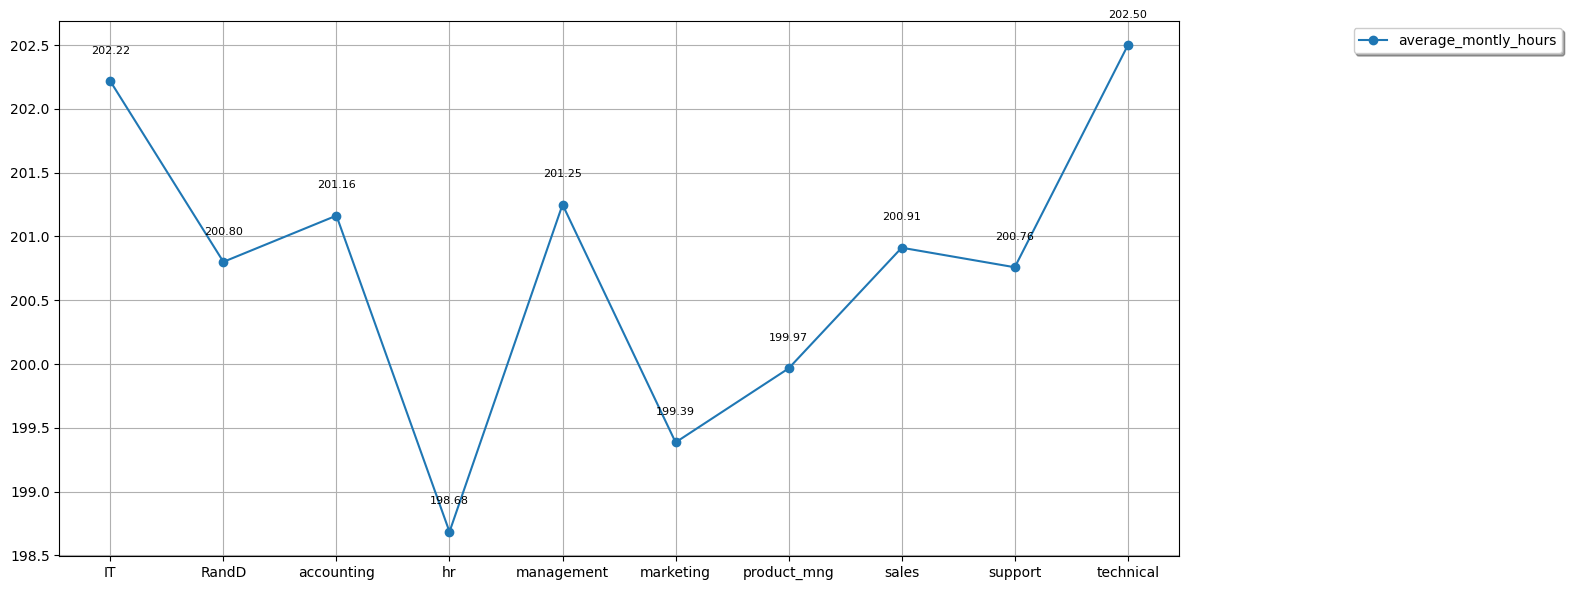

In [ ]:
ax = dept_df.plot.line(figsize=(16, 6), grid=True, marker='o')

for line in ax.get_lines():
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        ax.text(
            x,                              # X position
            y + 0.2,                        # Y position (just above the line)
            f'{y:.2f}',                     # Label text with two decimal places
            ha='center',                    # Horizontal alignment
            va='bottom',                    # Vertical alignment
            fontsize=8,                     # Font size
            rotation=0,                     # Rotation angle
            color='#000000'                 # Text color
        )

tick = range(len(dept_df))
plt.xticks(ticks=tick, labels=dept_df['Departments'], rotation=0)

plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

**Overview:**

**Objective**: To provide a summary of the average monthly working hours for different departments.

**Key Findings:**
**Highest Average Monthly Hours:**

  Technical: 202.50 hours
  IT: 202.22 hours

These departments have the highest average monthly working hours, indicating a higher average workload compared to others.

**Lowest Average Monthly Hours:**

  HR: 198.68 hours

The HR department has the lowest average monthly working hours, suggesting a relatively lighter workload compared to other departments.

**Average Monthly Hours by Department:**

  Management: 201.25 hours
  Accounting: 201.16 hours
  Sales: 200.91 hours
  Support: 200.76 hours
  Marketing: 199.39 hours
  Product Management: 199.97 hours
  RandD: 200.80 hours

Most departments have average monthly hours ranging from approximately 199 to 202 hours, reflecting a fairly consistent level of workload across the company.

**Insights:**

**Workload Distribution:** The data shows that average working hours are relatively high across all departments, with only minor variations.

**Departmental Comparison:** Departments such as Technical, IT, and Management are on the higher end of the average hours spectrum, while HR is on the lower end. This could indicate differing levels of work intensity and productivity requirements.

**Recommendations:**

For Resource Allocation: Consider reviewing the workload distribution and staffing requirements, especially for departments with significantly higher or lower average hours.

**Summary of Salary Distribution**

**Chart Type:** Pie Chart

**Title**: Salary Distribution

**Dimensions:**  600X800 pixels

**Key Insights:**

**Visual Representation:**

The pie chart provides a visual breakdown of the different salary levels within the organization.
The chart uses a hole in the center (doughnut style) to emphasize the proportions of each salary category.

In [ ]:
salary_counts = df['salary'].value_counts().reset_index()
salary_counts.columns = ['salary', 'count']

fig = px.pie(salary_counts, values='count', names='salary', title='Salary Distribution',
             hole=0.3, labels={'count': 'Salary Count'})

fig.update_layout(height=600, width=800, title_x=0.5)

fig.show()

**Overview Summary of Salary Distribution Data**

**Data Overview:**

**Categories:**

**Low Salary:** 7316 employees

**Medium Salary:** 6446 employees

**High Salary:** 1237 employees

**Key Insights:**

**Distribution of Salaries:**

**Low Salary:** The largest group, comprising 7316 employees, indicating that a significant portion of the workforce is in the lower salary bracket.

**Medium Salary:** The second largest group with 6446 employees, showing a substantial number of employees earning a medium salary.

**High Salary:** The smallest group, with 1237 employees, representing a much smaller proportion of the workforce in the higher salary bracket.

**Overview :**

The majority of employees are distributed between the low and medium salary categories, with the low salary group having the highest count.
The high salary group constitutes a smaller portion of the total employee base, highlighting a more selective distribution of higher salaries.

**Trends and Implications:**

Workforce Salary Distribution: The data suggests a predominantly lower to mid-range salary distribution, which may reflect the company's salary structure and compensation policies.
Budget Considerations: The concentration of employees in the low and medium salary categories might impact budgeting and compensation planning, especially if there's a need to adjust salaries or address equity concerns.


In [ ]:
time_spent_df = df.groupby('time_spend_company').agg({'satisfaction_level' : 'mean'}).reset_index()

time_spent_df

,time_spend_company,satisfaction_level
0,2,0.697078
1,3,0.626314
2,4,0.467517
3,5,0.610305
4,6,0.603440
5,7,0.635957
6,8,0.665062
7,10,0.655327


**Average Satisfaction Level by Time Spent at Company**

**Chart Overview:**

**Type of Chart:** Bar Chart


**Dimensions:** 16x6 inches


**Grid:** Enabled for readability

***Key Insights:***

**Data Representation:**

**X-Axis (Time Spent at Company)**: Displays different time intervals employees have spent at the company.

**Y-Axis (Satisfaction Level):** Represents the average satisfaction level of employees for each time interval.

**Trends Observed:**

The chart visualizes how employee satisfaction varies with the length of time spent at the company.

**Satisfaction Levels:** Insights into whether satisfaction increases, decreases, or remains stable as employees spend more time with the company.

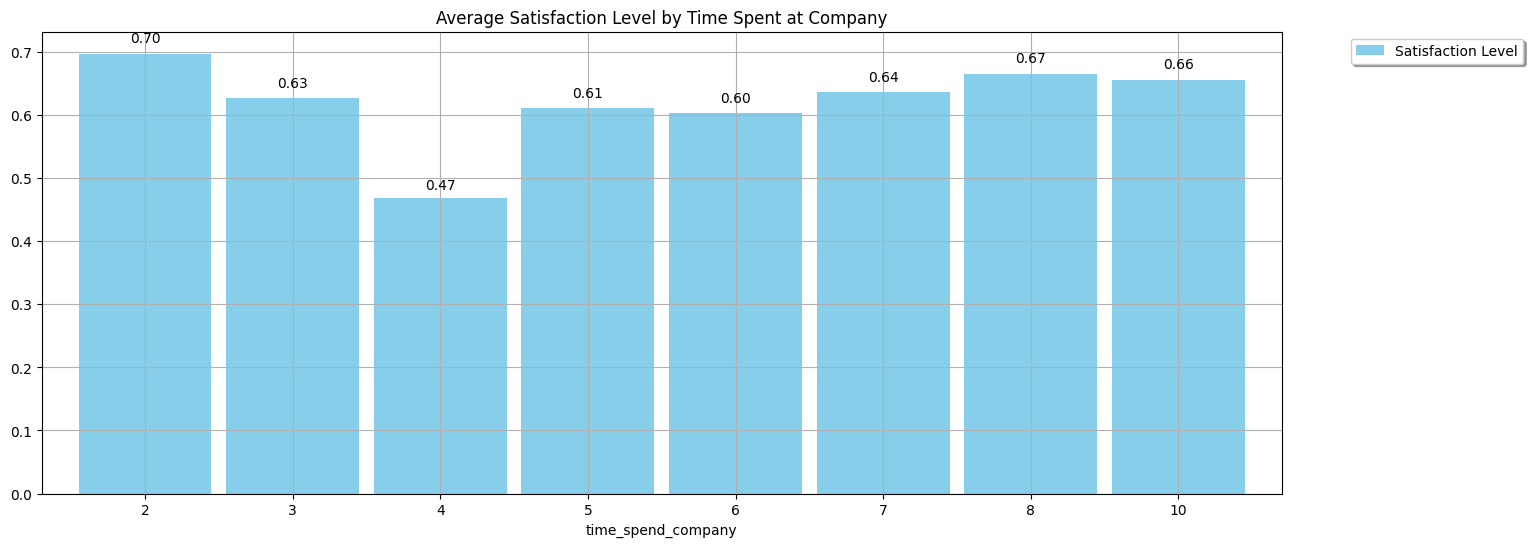

In [ ]:
bar_width = 0.9
ax = time_spent_df.plot.bar(x='time_spend_company', y='satisfaction_level', figsize=(16, 6), grid=True, color='skyblue', width=bar_width)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        label = f'{height:.2f}'  # Display the height with two decimal places
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position
            height + 0.02 * height,             # Y position (slightly above the bar)
            label,                              # Label text
            ha='center',                        # Horizontal alignment
            va='bottom',                        # Vertical alignment
            fontsize=10,                         # Font size
            rotation=0                          # No rotation
        )

tick = range(len(time_spent_df))
plt.xticks(ticks=tick, labels=time_spent_df['time_spend_company'], rotation=0)

plt.legend(['Satisfaction Level'], bbox_to_anchor=(1.05, 1), loc='upper left', fancybox=True, shadow=True)
plt.title('Average Satisfaction Level by Time Spent at Company')

plt.show()


**Data Summary:**

**Satisfaction Trends by Time Spent:**


**2 Years:** Employees with 2 years at the company have an average satisfaction level of 0.70.


**3 Years**: Satisfaction decreases slightly to 0.63.


**4 Years:** A more notable drop to 0.47, indicating lower satisfaction at this stage.


**5 Years:** Satisfaction rises again to 0.61.


**6 Years:** Slight improvement with an average of 0.60.


**7 Years:** Satisfaction increases to 0.64.


**8 Years:** Highest satisfaction level observed at 0.67.


**10 Years**: Satisfaction remains high at 0.66.

**Key Observations:**

**Initial Drop:** There is a noticeable decrease in satisfaction between 2 and 4 years.


**Recovery and Stability:** Satisfaction levels recover and stabilize after 4 years, peaking at 8 years before slightly dropping at 10 years.
Overall Trend: Despite some fluctuations, the general trend indicates that employees who stay longer tend to have relatively high satisfaction levels, particularly after overcoming an initial dip.


**Implications:**

**Employee Retention:** The data suggests that while there may be challenges in satisfaction during the mid-years of employment, long-term employees often reach a stable and higher level of satisfaction.

**Potential Areas for Improvement:** Addressing the factors contributing to lower satisfaction in the 3-4 year range could be beneficial in improving overall employee satisfaction.

In [ ]:
fig = px.bar(time_spent_df, x='time_spend_company', y='satisfaction_level',
             title='Average Satisfaction Level by Time Spent at Company',
             labels={'time_spend_company': 'Time Spent at Company', 'satisfaction_level': 'Satisfaction Level'},
             text=time_spent_df['satisfaction_level'].round(2))

fig.show()

In [ ]:
project_salary_df = df.groupby(['number_project', 'salary']).size().unstack(fill_value=0).reset_index()

project_salary_df

salary,number_project,high,low,medium
0,2,140,1344,904
1,3,408,1791,1856
2,4,368,2087,1910
3,5,245,1317,1199
4,6,73,633,468
5,7,3,144,109


**Overview of Number of Projects Split by Salary**

**Chart Overview:**

**Type of Chart:** Stacked Bar Chart

**Size :** (600X800)

**Color Coding:**
**Low Salary:** Red,**Medium Salary:** Blue,**High Salary:** Green



**Data Summary:**

**Chart Details:**

**X-Axis (Number of Projects):** Represents the different project counts.

**Y-Axis (Count):** Shows the number of employees in each salary category (Low, Medium, High) for each project count.

**Visualization:**

**Stacked Bars:** Each bar is divided into segments representing the counts of employees with different salary levels. The segments are stacked on top of each other to show the composition of salary categories within each project count.

**Key Observations:**

**Distribution Across Projects**: The chart visualizes how employees with different salary levels are distributed across various project counts.

**Salary Composition:** The relative size of each colored segment within the bars provides insights into how the proportion of low, medium, and high salary employees changes with the number of projects.

In [ ]:
fig = px.bar(project_salary_df, x='number_project', y=['low', 'medium', 'high'],
             title='Number of Projects Split by Salary',
             labels={'number_project': 'Number of Projects', 'value': 'Count'},
             color_discrete_map={'low': 'red', 'medium': 'blue', 'high': 'green'})


fig.update_layout(barmode='stack', height=600, width=800, title_x=0.5)

fig.show()

**Data Overview:**

**Objective:** To analyze the distribution of employees across different salary levels and their associated number of projects.


**Data Summary:**

**Project Count Analysis:**

# 2 Projects:
High Salary: 140 employees,
Medium Salary: 904 employees
and Low Salary: 1344 employees
# 3 Projects:
High Salary: 408 employees
,Medium Salary: 1856 employees
and Low Salary: 1791 employees
# 4 Projects:
High Salary: 368 employees
,Medium Salary: 1910 employees
and Low Salary: 2087 employees
# 5 Projects:
High Salary: 245 employees
,Medium Salary: 1199 employees
and Low Salary: 1317 employees
# 6 Projects:
High Salary: 73 employees
,Medium Salary: 468 employees
and Low Salary: 633 employees
# 7 Projects:
High Salary: 3 employees
,Medium Salary: 109 employees
and Low Salary: 144 employees

#Key Observations:
**High Salary Employees:** Generally, fewer high-salary employees are associated with a higher number of projects. For example, only 3 high-salary employees have 7 projects.

**Medium Salary Employees:** Medium-salary employees have a fairly consistent distribution across project counts, with a notable peak in the 3-4 project range.

**Low Salary Employees:** Low-salary employees dominate in lower project counts but are also well-represented in higher project counts, indicating a broader distribution across project levels.
Implications:

**Resource Allocation:** The data suggests that high-salary employees are less likely to handle a high number of projects compared to their medium and low-salary counterparts. This could be due to roles and responsibilities associated with higher salaries.

**Compensation Strategy:** Understanding the distribution can help in assessing if compensation aligns with project load and employee roles.




In [ ]:
left_df = df.groupby(['Departments', 'promotion_last_5years']).agg({'left': 'count'}).reset_index()

left_df = left_df.pivot_table(index = 'Departments',columns = 'promotion_last_5years',values = 'left')
left_df.fillna(0)

promotion_last_5years,0,1
Departments,,
IT,1224.0,3.0
RandD,760.0,27.0
accounting,753.0,14.0
hr,724.0,15.0
management,561.0,69.0
marketing,815.0,43.0
product_mng,902.0,0.0
sales,4040.0,100.0
support,2209.0,20.0


**Employee Departures by Promotion and Department**


**Chart Overview:**
Type of Chart: Horizontal Bar Chart

**Dimensions:** 14X6

**Chart Details:**

**X-Axis (Count of Departures):** Represents the number of employees who have left the company.

**Y-Axis (Departments):** Lists the departments in the organization.

**Key Observations:**

**Promotion Status Impact:** The chart displays the count of employees who have left the company, segmented by promotion status within each department.


**Departmental Insights:** Some departments may show higher counts of departures due to various factors, such as promotion status, which could indicate different impacts of promotions on employee retention.

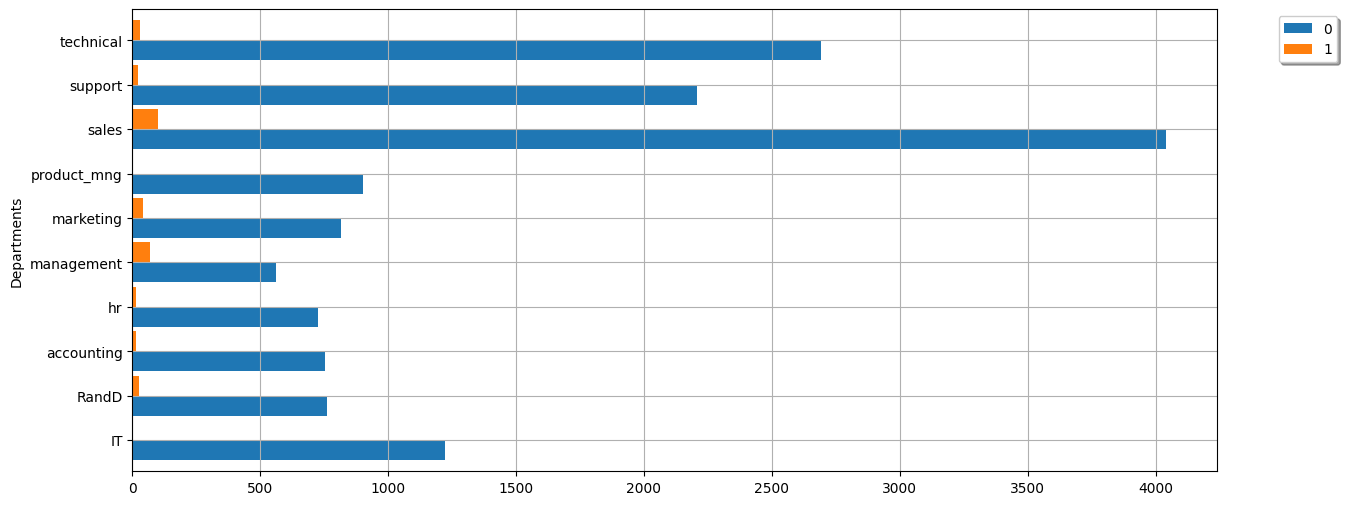

In [ ]:
bar_width  = 0.9
left_df.plot.barh(figsize = (14,6),grid = True,width = bar_width)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fancybox=True, shadow=True)

plt.show()

**Objective:** To analyze the distribution of employee departures across different departments and their promotion status over the last 5 years.

**Promotion Status Analysis:**

**Promotion Status 0 (No Promotion):** Represents the number of employees who have not received a promotion in the last 5 years.

**Promotion Status 1 (Received Promotion):** Represents the number of employees who have received a promotion in the last 5 years.

**Departmental Breakdown:**

**IT:**

No. of Promotion: 1224 employees

Received Promotion: 3 employees

**RandD:**

No Promotion: 760 employees

Received Promotion: 27 employees

**Accounting:**

No Promotion: 753 employees

Received Promotion: 14 employees

**HR:**

No Promotion: 724 employees

Received Promotion: 15 employees

**Management:**

No Promotion: 561 employees

Received Promotion: 69 employees

**Marketing:**

No Promotion: 815 employees

Received Promotion: 43 employees

**Product Management:**

No Promotion: 902 employees

Received Promotion: 0 employees

**Sales:**

No Promotion: 4040 employees

Received Promotion: 100 employees

**Support:**

No Promotion: 2209 employees

Received Promotion: 20 employees

**Technical:**

No Promotion: 2692 employees

Received Promotion: 28 employees

**Key Observations:**

**Departments with High Promotion Counts:** Management and Sales have the highest numbers of employees who received promotions, indicating a potentially effective promotion strategy in these departments.

**Departments with Low Promotion Counts:** Product Management has no employees with promotions in the last 5 years, which could suggest a need for revising promotion policies in this department.

**Large Departments:** Sales and Technical departments have the largest number of employees without promotions, possibly indicating a larger workforce or fewer promotional opportunities in these areas.